In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, cophenet, dendrogram

np.set_printoptions(suppress=True)   # To avoid number in exp form

from sklearn.metrics.pairwise import euclidean_distances

In [82]:
data=pd.read_excel('pca data.xlsx')

In [83]:
data

,AccelSec,TopSpeed_KmH,Range_Km
0,4.6,233,450
1,10.0,160,270
2,4.7,210,400
3,6.8,180,360
4,9.5,145,170
5,2.8,250,610
6,9.6,150,190
7,8.1,150,275
8,5.6,225,310
9,6.3,180,400


## Find out the principle component for this data

### Step 1 : Standardize

In [84]:
sc= StandardScaler()

In [85]:
data_s=sc.fit_transform(data)
data_s=pd.DataFrame(data_s,columns=data.columns)
data_s

,AccelSec,TopSpeed_KmH,Range_Km
0,-0.998198,1.540888,0.954850
1,1.408172,-0.690954,-0.631670
2,-0.953636,0.837705,0.514150
3,-0.017825,-0.079490,0.161590
4,1.185360,-1.149551,-1.513071
5,-1.800321,2.060632,2.365091
6,1.229922,-0.996686,-1.336791
7,0.561486,-0.996686,-0.587600
8,-0.552574,1.296303,-0.279110
9,-0.240637,-0.079490,0.514150


### Step 2 : Covariance Matrix

In [86]:
cov_mat=np.cov(data_s.T)
cov_mat

array([[ 1.07142857, -0.92455387, -0.93045171],
       [-0.92455387,  1.07142857,  0.8855046 ],
       [-0.93045171,  0.8855046 ,  1.07142857]])

In [87]:
cov_mat.shape

(3, 3)

### Step 3 : Eigen value, Eigen vector of cov mat

In [88]:
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [89]:
eig_val

array([2.89857911, 0.1295811 , 0.18612551])

In [90]:
eig_vec

array([[ 0.58317464, -0.81091338, -0.04823714],
       [-0.57378162, -0.36915023, -0.73109696],
       [-0.57504956, -0.45403479,  0.68056625]])

### Step 4 : Sort the eigen value in Desc order

In [91]:
eig_val1=eig_val[0]
eig_val2=eig_val[2]
eig_val3=eig_val[1]

In [92]:
eig_vec1=eig_vec[:,0]
eig_vec2=eig_vec[:,2]
eig_vec3=eig_vec[:,1]

### Step 5 : Find out PC's

In [93]:
pcs_data=pd.DataFrame(columns=['PC1','PC2','PC3'])

In [94]:
pcs_data['PC1']=data_s.dot(eig_vec1)
pcs_data['PC2']=data_s.dot(eig_vec2)
pcs_data['PC3']=data_s.dot(eig_vec3)

In [95]:
pcs_data

,PC1,PC2,PC3
0,-2.015343,-0.428549,-0.192902
1,1.580909,0.007335,-0.600040
2,-1.332458,-0.216530,0.230635
3,-0.057707,0.168948,-0.029569
4,2.220954,-0.246490,0.150120
5,-3.592299,0.189922,-0.374612
6,2.057860,-0.240429,-0.022484
7,1.237224,0.301688,0.179401
8,-0.905540,-1.111021,0.096285
9,-0.390385,0.419636,-0.008962


<Axes: >

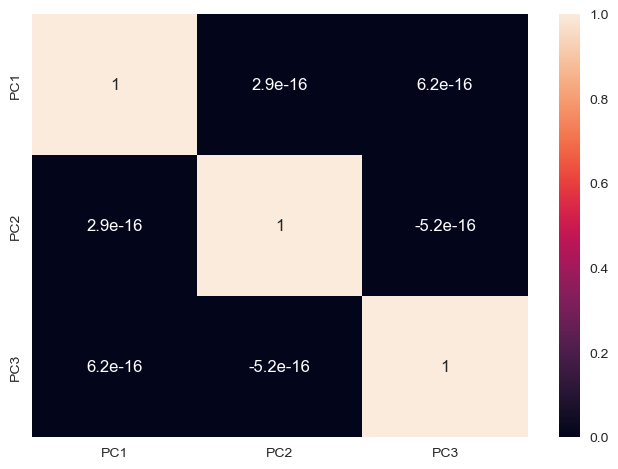

In [96]:
sns.heatmap(pcs_data.corr(),annot=True)

### Step 6 : Find the explainded variance ratio

In [97]:
evr_val1=eig_val1/(np.sum(eig_val))
evr_val1

0.9017801672776881

In [98]:
evr_val2=eig_val2/(np.sum(eig_val))
evr_val2

0.05790571365427059

In [99]:
evr_val3=eig_val3/(np.sum(eig_val))
evr_val3

0.04031411906804138

In [100]:
evr_val1+evr_val2+evr_val3

1.0

<Axes: xlabel='PC1', ylabel='PC2'>

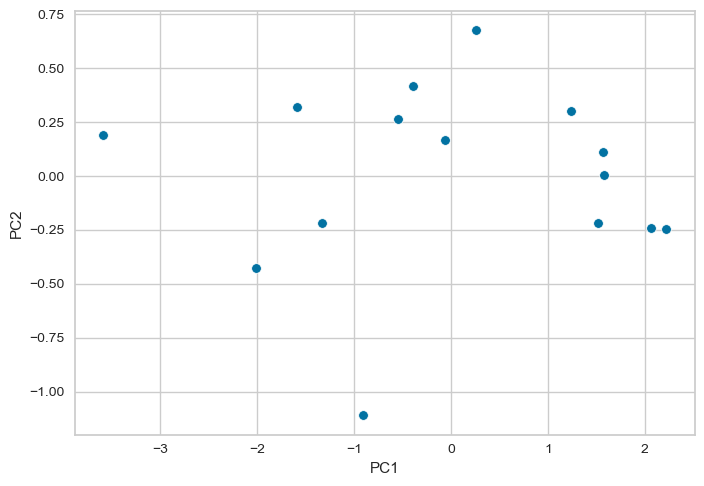

In [101]:
sns.scatterplot(x=pcs_data['PC1'],y=pcs_data['PC2'])

### Now let's use PCA function from sklearn

In [102]:
from sklearn.decomposition import PCA  #(direct but have to scale the data)

In [103]:
data_s

,AccelSec,TopSpeed_KmH,Range_Km
0,-0.998198,1.540888,0.954850
1,1.408172,-0.690954,-0.631670
2,-0.953636,0.837705,0.514150
3,-0.017825,-0.079490,0.161590
4,1.185360,-1.149551,-1.513071
5,-1.800321,2.060632,2.365091
6,1.229922,-0.996686,-1.336791
7,0.561486,-0.996686,-0.587600
8,-0.552574,1.296303,-0.279110
9,-0.240637,-0.079490,0.514150


In [104]:
pca=PCA(n_components=3)

In [105]:
pcs=pca.fit_transform(data_s)
pcs=pd.DataFrame(pcs,columns=['PC1','PC2','PC3'])
pcs

,PC1,PC2,PC3
0,2.015343,0.428549,0.192902
1,-1.580909,-0.007335,0.600040
2,1.332458,0.216530,-0.230635
3,0.057707,-0.168948,0.029569
4,-2.220954,0.246490,-0.150120
5,3.592299,-0.189922,0.374612
6,-2.057860,0.240429,0.022484
7,-1.237224,-0.301688,-0.179401
8,0.905540,1.111021,-0.096285
9,0.390385,-0.419636,0.008962


### Eigen Values

In [107]:
pca.explained_variance_   # Eigen Value

array([2.89857911, 0.18612551, 0.1295811 ])

In [109]:
pca.components_.T     # Eigen Vector

array([[-0.58317464,  0.04823714,  0.81091338],
       [ 0.57378162,  0.73109696,  0.36915023],
       [ 0.57504956, -0.68056625,  0.45403479]])

In [111]:
# Explained variance Ratio
pca.explained_variance_ratio_

array([0.90178017, 0.05790571, 0.04031412])

In [112]:
np.cumsum(pca.explained_variance_ratio_)

array([0.90178017, 0.95968588, 1.        ])

In [113]:
pca.explained_variance_ratio_

array([0.90178017, 0.05790571, 0.04031412])